In [17]:
%autosave 10
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn import preprocessing

Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [4]:
df=pd.read_csv('cleaned_data.csv')
print(df.shape)
df.head()


(26664, 30)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [10]:
X=df.loc[:,~df.columns.isin(['default payment next month','EDUCATION_CAT','ID'])]
Y=df['default payment next month']

In [11]:
print(X.shape)
print(Y.shape)

(26664, 27)
(26664,)


In [42]:
X = preprocessing.StandardScaler().fit(X).transform(X)
Y=np.asarray(Y)

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=2)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape


((19998, 27), (6666, 27), (19998,), (6666,))

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [76]:
clf=LogisticRegression(solver='saga',n_jobs=-1,max_iter=1000)
clf.fit(X_train,Y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [77]:
Y_pred=clf.predict_proba(X_test)
Y_pred

array([[0.4672796 , 0.5327204 ],
       [0.92463233, 0.07536767],
       [0.91489179, 0.08510821],
       ...,
       [0.885602  , 0.114398  ],
       [0.9652316 , 0.0347684 ],
       [0.85958744, 0.14041256]])

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [78]:
ruc_score=roc_auc_score(Y_test,Y_pred[:,1])
ruc_score



0.7318497046949227

_________________________________________________________________________
**Now, plot the ROC curve.**


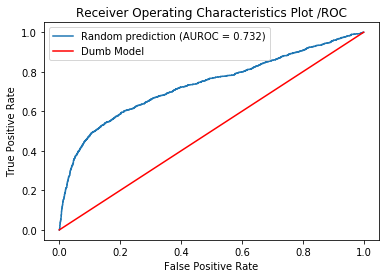

In [85]:
fpr, tpr, thresholds = roc_curve(Y_test,Y_pred[:,1])

plt.plot(fpr, tpr, label='Random prediction (AUROC = %0.3f)' % ruc_score)
plt.plot([0, 1], [0, 1], label='Dumb Model',color='red')

plt.title('Receiver Operating Characteristics Plot /ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend() 
plt.show()

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [89]:
precision = average_precision_score(Y_test, Y_pred[:,1])
print('Average precision-recall score: ',precision)

Average precision-recall score:  0.5276632507281264


_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


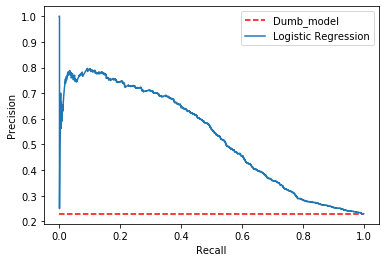

In [97]:
dumb_model = len(Y_test[Y_test==1]) / len(Y_test)
plt.plot([0, 1], [dumb_model, dumb_model], linestyle='--', label='Dumb_model',color='red')
precision, recall, _ = precision_recall_curve(Y_test, Y_pred[:,1])
plt.plot(recall, precision, label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [98]:
auc_score = auc(recall, precision)
print('Logistic Precision-Recall AUC: ',auc_score)



Logistic Precision-Recall AUC:  0.5271592364480052


_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [99]:
Y_pred_train=clf.predict_proba(X_train)
ruc_score_train=roc_auc_score(Y_train,Y_pred_train[:,1])
ruc_score_train

0.7234038711087698

    How is this different, conceptually and quantitatively, from your earlier calculation?
